Project - Probability

Import module / library

In [421]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

Connect source

In [422]:
# Load source (csv)
data_insurance = pd.read_csv("insurance.csv")

# Show data
data_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking data

Check data type & values

In [423]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Add BMI Category

BMI Category based on : https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

In [424]:
# Function to define BMI category
def map_bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25.0:
        return "Healthy Weight"
    elif 25.0 <= bmi < 30.0:
        return "Overweight"
    else:
        return "Obesity"

# Crate new column 
# Menambahkan kolom kategori BMI ke dataframe
data_insurance["bmi_category"] = data_insurance["bmi"].apply(map_bmi_category)

# Menampilkan data asuransi dengan kolom kategori BMI
data_insurance

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Healthy Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesity
1334,18,female,31.920,0,no,northeast,2205.98080,Obesity
1335,18,female,36.850,0,no,southeast,1629.83350,Obesity
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


Analysis Descriptive Statistic

In [425]:
# Check overall descriptive statistic
data_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [469]:
# Count data based on bmi_category, sex, and smoker
count = data_insurance.groupby(["bmi_category", "sex", "smoker"]).size().reset_index(name="count")

# Show result
print("Count data:")
pd.pivot_table(count, index=["bmi_category", "sex"], columns="smoker", values="count", aggfunc="sum", margins=True)


Count data:


smoker                   no  yes   All
bmi_category   sex                    
Healthy Weight female    89   28   117
               male      86   22   108
Obesity        female   282   52   334
               male     280   93   373
Overweight     female   168   31   199
               male     144   43   187
Underweight    female     8    4    12
               male       7    1     8
All                    1064  274  1338

In [426]:
# Average age based on bmi category 
avg_age = data_insurance.groupby(["bmi_category", "sex", "smoker"])["age"].mean().reset_index()

# Show result
print("Average Age :")
pd.pivot_table(avg_age, index=["bmi_category", "sex"], columns="smoker", values="age", margins=True)

Average Age :


smoker                        no        yes        All
bmi_category   sex                                    
Healthy Weight female  36.808989  36.142857  36.475923
               male    35.802326  40.818182  38.310254
Obesity        female  40.634752  39.288462  39.961607
               male    40.682143  39.032258  39.857200
Overweight     female  39.803571  40.677419  40.240495
               male    38.256944  36.441860  37.349402
Underweight    female  36.125000  31.000000  33.562500
               male    30.857143  18.000000  24.428571
All                    37.371358  35.175130  36.273244

In [427]:
# Average insurance charges based on bmi category 
avg_charge = data_insurance.groupby(["bmi_category", "sex", "smoker"])["charges"].mean().reset_index()

# Show result
print("Average Charges :")
pd.pivot_table(avg_charge, index=["bmi_category", "sex"], columns="smoker", values="charges", margins=True)

Average Charges :


smoker                          no           yes           All
bmi_category   sex                                            
Healthy Weight female  8168.805664  19618.968270  13893.886967
               male    7185.652306  20353.639569  13769.645938
Obesity        female  9216.774277  42320.620687  25768.697482
               male    8465.936799  41131.572592  24798.754695
Overweight     female  8427.927867  22479.403700  15453.665784
               male    8059.668390  22507.748218  15283.708304
Underweight    female  6366.336356  20304.917450  13335.626903
               male    4580.599421  12829.455100   8705.027261
All                    7558.962635  25193.290698  16376.126667

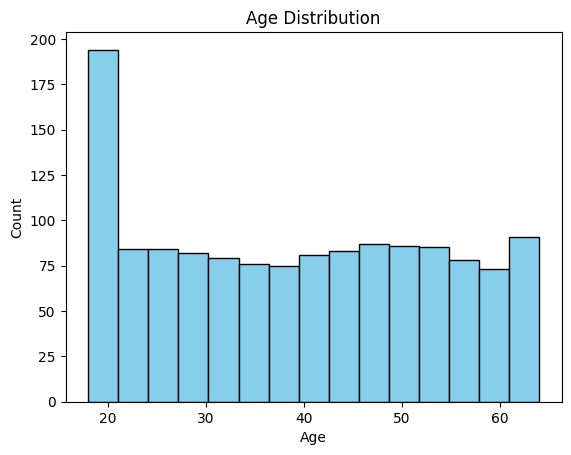

In [428]:
# Create a histogram of age distribution
plt.hist(data_insurance["age"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


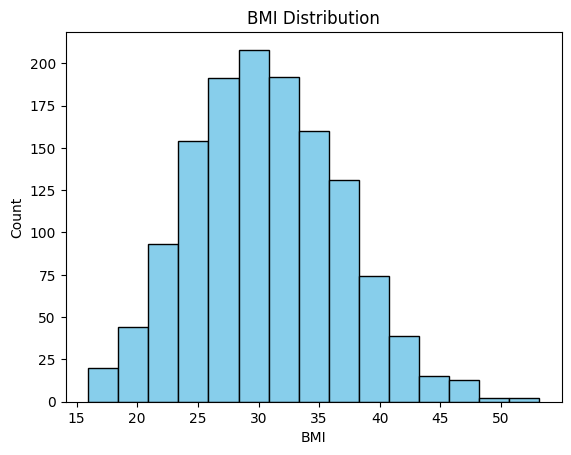

In [429]:
# Create a histogram of bmi distribution
plt.hist(data_insurance["bmi"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")
plt.show()


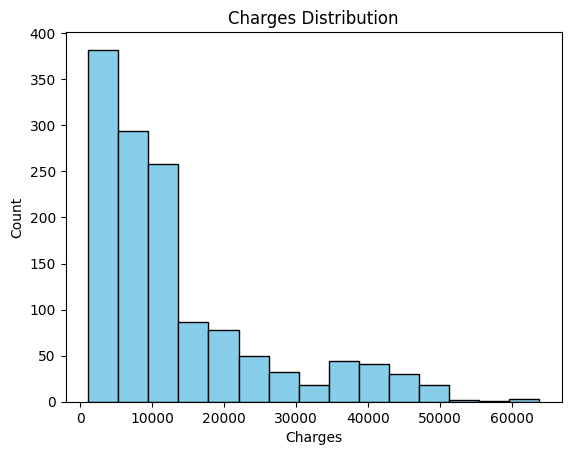

In [430]:
# Create a histogram of charges distribution
plt.hist(data_insurance["charges"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.title("Charges Distribution")
plt.show()


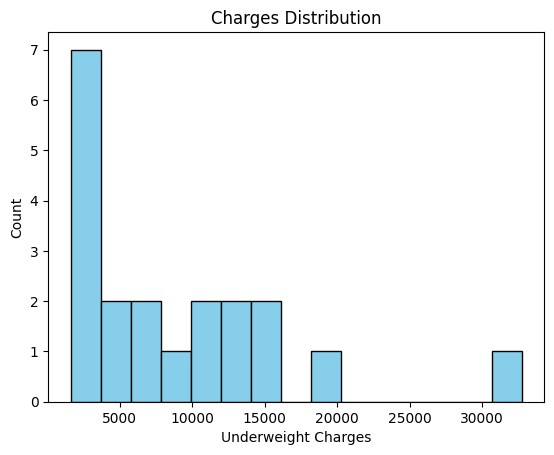

In [431]:
# Filter underweight data
charges_underweight = data_insurance[data_insurance["bmi_category"]=="Underweight"][["charges"]]

# Create a histogram of charges distribution - underweight 
plt.hist(charges_underweight["charges"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Underweight Charges")
plt.ylabel("Count")
plt.title("Charges Distribution")
plt.show()

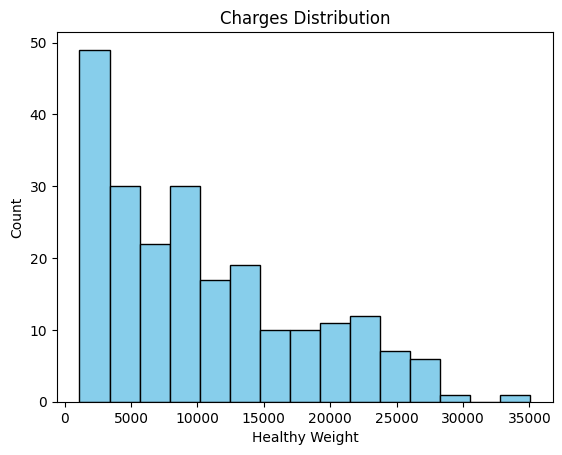

In [432]:
# Filter healthy weight data
charges_healthy = data_insurance[data_insurance["bmi_category"]=="Healthy Weight"][["charges"]]

# Create a histogram of charges distribution - healthy weight 
plt.hist(charges_healthy["charges"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Healthy Weight")
plt.ylabel("Count")
plt.title("Charges Distribution")
plt.show()

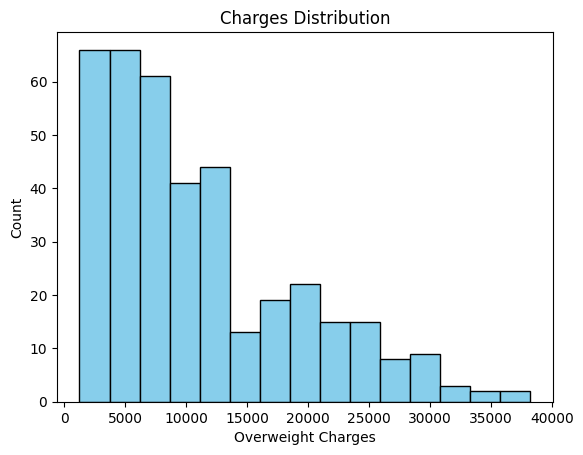

In [433]:
# Filter overweight data
charges_overweight = data_insurance[data_insurance["bmi_category"]=="Overweight"][["charges"]]

# Create a histogram of charges distribution - Overweight 
plt.hist(charges_overweight["charges"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Overweight Charges")
plt.ylabel("Count")
plt.title("Charges Distribution")
plt.show()

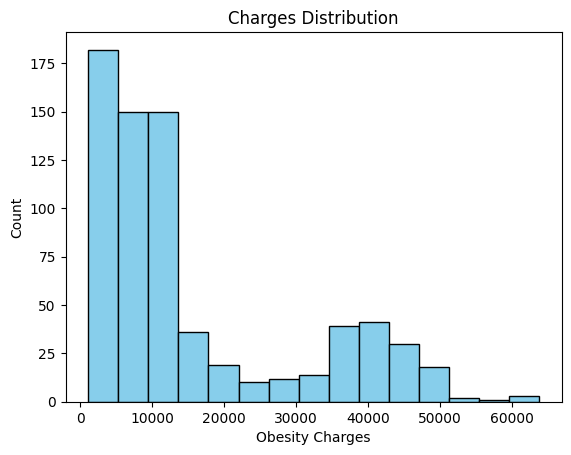

In [434]:
# Filter obesity data
charges_obesity = data_insurance[data_insurance["bmi_category"]=="Obesity"][["charges"]]

# Create a histogram of charges distribution - Obesity 
plt.hist(charges_obesity["charges"], bins=15, color="skyblue", edgecolor="black")
plt.xlabel("Obesity Charges")
plt.ylabel("Count")
plt.title("Charges Distribution")
plt.show()

Discrete Variable Analysis

Customer Region

In [435]:
# Calculating the number of customers based on the region.
freq_region = data_insurance["region"].value_counts()

# Show result
freq_region

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

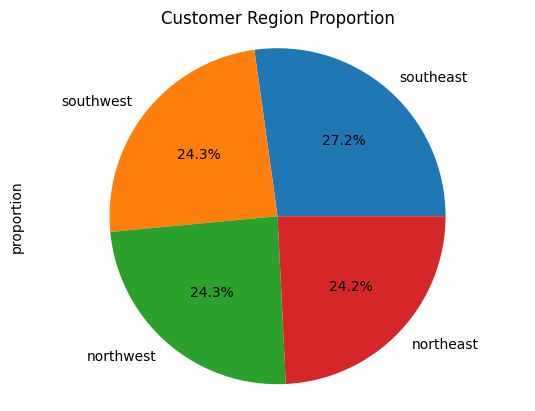

In [436]:
# Calculating the proportion of customers based on the region
prop_region = data_insurance["region"].value_counts(normalize=True)

# Create pie chart
prop_region.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Customer Region Proportion")

# Show result
plt.show()

Customer Gender

In [437]:
# Calculating the number of customers based on the gender
freq_sex = data_insurance["sex"].value_counts()

# Show result
freq_sex

sex
male      676
female    662
Name: count, dtype: int64

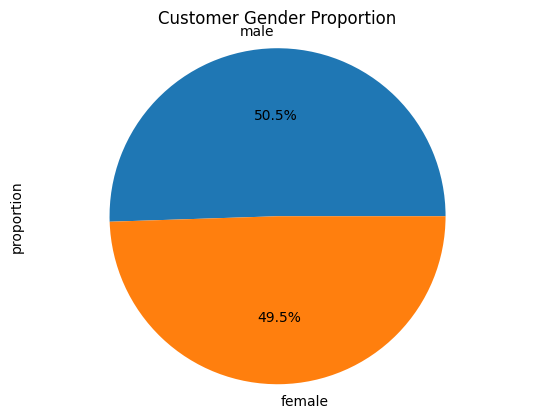

In [438]:
# Calculating the proportion of customers based on the gender
prop_sex = data_insurance["sex"].value_counts(normalize=True)

# Create pie chart
prop_sex.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Customer Gender Proportion")

# Show result
plt.show()

Customer BMI Category

In [439]:
# Calculating the number of customers based on the BMI type category.
freq_bmi_category = data_insurance["bmi_category"].value_counts()

#Show result
freq_bmi_category

bmi_category
Obesity           707
Overweight        386
Healthy Weight    225
Underweight        20
Name: count, dtype: int64

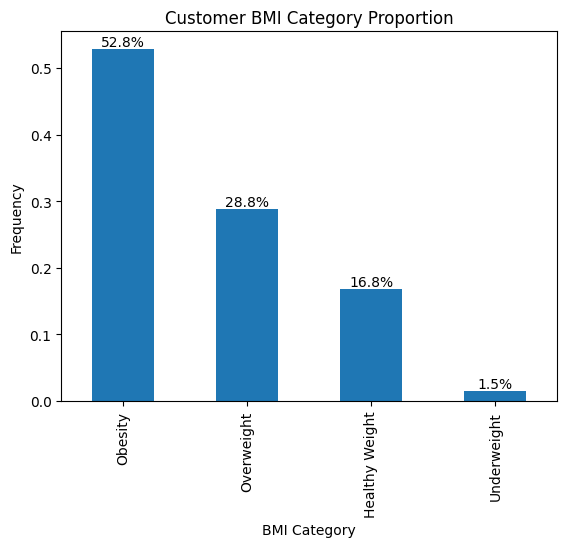

In [440]:
# Calculating the proportion of customers based on the BMI type category.
prop_bmi_category = data_insurance["bmi_category"].value_counts(normalize=True)

# Create bar chart
prop_bmi_category.plot(kind="bar")
plt.xlabel("BMI Category")
plt.ylabel("Frequency")
plt.title("Customer BMI Category Proportion")

# Add percentage labels on bars
total_count = len(data_insurance)
for i, count in enumerate(prop_bmi_category):
    percentage = count * 100
    plt.text(i, count, f"{percentage:.1f}%", ha="center", va="bottom")

# Show result
plt.show()

Probability of an obese gender

In [441]:
# Calculating the count of obese's gender
female_obese = len(data_insurance[(data_insurance["sex"] == "female") & (data_insurance["bmi_category"] == "Obesity")])
male_obese = len(data_insurance[(data_insurance["sex"] == "male") & (data_insurance["bmi_category"] == "Obesity")])

# Calculating the count of smokers
total_obese = len(data_insurance[data_insurance["bmi_category"] == "Obesity"])

# Calculating the probability of someone gender if they are an obese
probability_female_obese = female_obese / total_obese
probability_male_obese = male_obese / total_obese

# Show result
print("If an individual is an obese, the probability of their gender are:")
print(f"Female = {probability_female_obese:.2%}")
print(f"Male = {probability_male_obese:.2%}")


If an individual is an obese, the probability of their gender are:
Female = 47.24%
Male = 52.76%


In [456]:
total_obese

707

Customer Smoker or Non Smoker

In [442]:
# Calculating the number of customers based on the smoker category
freq_smoker = data_insurance["smoker"].value_counts()

# Show result
freq_smoker

smoker
no     1064
yes     274
Name: count, dtype: int64

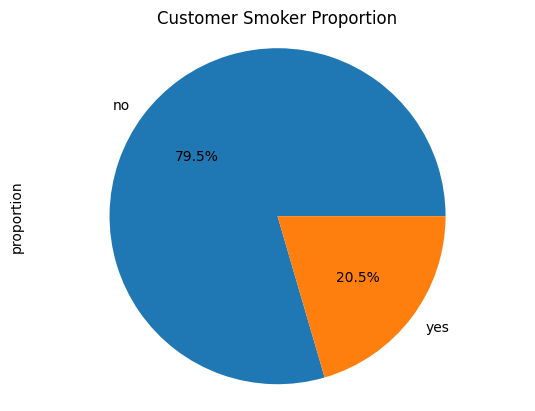

In [443]:
# Calculating the proportion of customers based on the smoker category
prop_smoker = data_insurance["smoker"].value_counts(normalize=True)

# Create pie chart
prop_smoker.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Customer Smoker Proportion")

# Show result
plt.show()

Probability of smoker gender

In [444]:
# Calculating the count of smoker's gender
female_smoker = len(data_insurance[(data_insurance["sex"] == "female") & (data_insurance["smoker"] == "yes")])
male_smoker = len(data_insurance[(data_insurance["sex"] == "male") & (data_insurance["smoker"] == "yes")])

# Calculating the count of smokers
total_smoker = len(data_insurance[data_insurance["smoker"] == "yes"])

# Calculating the probability of someone gender if they are a smoker
probability_female_smoker = female_smoker / total_smoker
probability_male_smoker = male_smoker / total_smoker

# Displaying the result
print("If an individual is a smoker, the probability of their gender are:")
print(f"Female = {probability_female_smoker:.2%}")
print(f"Male = {probability_male_smoker:.2%}")


If an individual is a smoker, the probability of their gender are:
Female = 41.97%
Male = 58.03%


Continuous Variable Analysis

Which is more likely to happen?

A. Someone with the BMI category Obesity gets an insurance bill above 16.7k

or

B. Someone with the BMI category Healthy Weight gets an insurance bill 16.7k

In [445]:
# Calculate the total number of cases that meet condition A
total_a1 = len(data_insurance[data_insurance["bmi_category"] == "Obesity"])
case_a1 = len(data_insurance[(data_insurance["bmi_category"] == "Obesity") & (data_insurance["charges"] > 16700)][["charges"]])

# Calculate the total number of cases that meet condition B
total_b1 = len(data_insurance[data_insurance["bmi_category"] == "Healthy Weight"])
case_b1 = len(data_insurance[(data_insurance["bmi_category"] == "Healthy Weight") & (data_insurance["charges"] > 16700)][["charges"]])

# Calculate the probabilities
prob_a1 = case_a1 / total_a1
prob_b1 = case_b1 / total_b1

# Determine the comparison of probabilities
if prob_a1 > prob_b1:
    compare_prob1 = "Condition A is more likely to occur"
elif prob_a1 < prob_b1:
    compare_prob1 = "Condition B is more likely to occur"
else:
    compare_prob1 = "Both conditions have the same number of cases"

# Display the results
print(f"Number of cases with BMI category 'obesity' and health charges above 16,700: {case_a1} (Probability {prob_a1:.2%})")
print(f"Number of cases with BMI category 'healthy weight' and health charges above 16,700: {case_b1} (Probability {prob_b1:.2%})")
print(f"The comparison of probabilities between the two conditions is: {compare_prob1}")


Number of cases with BMI category 'obesity' and health charges above 16,700: 191 (Probability 27.02%)
Number of cases with BMI category 'healthy weight' and health charges above 16,700: 49 (Probability 21.78%)
The comparison of probabilities between the two conditions is: Condition A is more likely to occur


Which is more likely to happen?

A. Smoker with the BMI category Obesity gets an insurance bill above 16.7k

or

B. Non smoker with the BMI category Obesity gets an insurance bill above 16.7k

In [446]:
# Calculate the total number of cases that meet condition A
total_a2 = len(data_insurance[(data_insurance["bmi_category"] == "Obesity") & (data_insurance["smoker"] == "yes")])
case_a2 = len(data_insurance[(data_insurance["bmi_category"] == "Obesity") & (data_insurance["charges"] > 16700) & (data_insurance["smoker"] == "yes")][["charges"]])

# Calculate the total number of cases that meet condition B
total_b2 = len(data_insurance[(data_insurance["bmi_category"] == "Obesity") & (data_insurance["smoker"] == "no")])
case_b2 = len(data_insurance[(data_insurance["bmi_category"] == "Obesity") & (data_insurance["charges"] > 16700) & (data_insurance["smoker"] == "no")][["charges"]])

# Calculate the probabilities
prob_a2 = case_a2 / total_a2
prob_b2 = case_b2 / total_b2

# Determine the comparison of probabilities
if prob_a2 > prob_b2:
    compare_prob2 = "Condition A is more likely to occur"
elif prob_a2 < prob_b2:
    compare_prob2 = "Condition B is more likely to occur"
else:
    compare_prob2 = "Both conditions have the same number of cases"

# Display the results
print(f"Number of cases with smoker BMI category 'obesity' and health charges above 16,700 : {case_a2} (Probability {prob_a2:.2%})")
print(f"Number of cases with non smoker BMI category 'obesity' and health charges above 16,700 : {case_b2} (Probability {prob_b2:.2%})")
print(f"The comparison of probabilities between the two conditions is: {compare_prob2}")

Number of cases with smoker BMI category 'obesity' and health charges above 16,700 : 145 (Probability 100.00%)
Number of cases with non smoker BMI category 'obesity' and health charges above 16,700 : 46 (Probability 8.19%)
The comparison of probabilities between the two conditions is: Condition A is more likely to occur


In [447]:
# re-check facts
# print(f"total obese: {total_a1}")
# print(f"total obese smoker : {total_a2}")
# print(f"total obese smoker : {total_b2}")

# print(f"total obese bill > 16.7 : {case_a1}")
# print(f"total obese smoker bill > 16.7 : {case_a2}")
# print(f"total obese non-smoker bill > 16.7 : {case_b2}")

Variable Correlation Analysis

In [448]:
# Drop object columns 
drop_column = ["sex", "smoker", "region", "bmi_category"]

# Create new data frame for correlation
data_corr  = data_insurance.drop(drop_column, axis=1)

# Calculate correlation matrix
correlation = data_corr.corr()

# SHow result
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


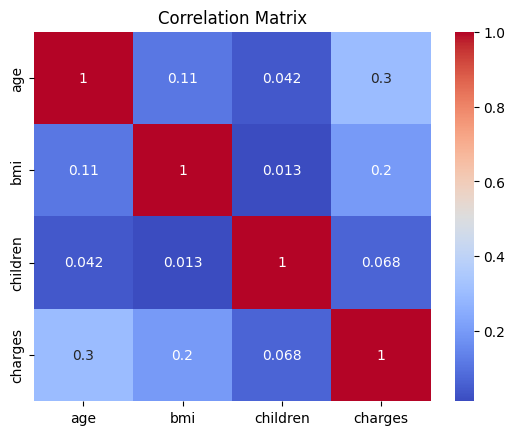

In [449]:
# Generate a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")

# Show result
plt.show()

BMI vs Charges

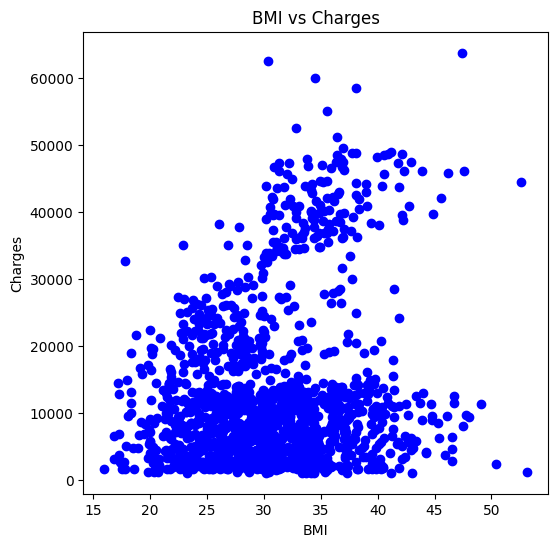

In [513]:
# Correlation between insurance charges and bmi

# Create scatter plot
plt.figure(figsize=(6, 6))  # Set figure size
plt.scatter(x=data_insurance["bmi"], y=data_insurance["charges"], color="blue")
plt.title("BMI vs Charges")  # Set title
plt.xlabel("BMI")  # Set x-axis label
plt.ylabel("Charges")  # Set y-axis label

#Show resulys
plt.show()


In [525]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data_insurance["bmi"], data_insurance["charges"])

# Display the correlation coefficient and p-value
print("Pearson Correlation Coefficient: {:.2f}".format(correlation_coefficient))
print("p-value: {:.4f}".format(p_value))

Pearson Correlation Coefficient: 0.20
p-value: 0.0000


Age vs Charges

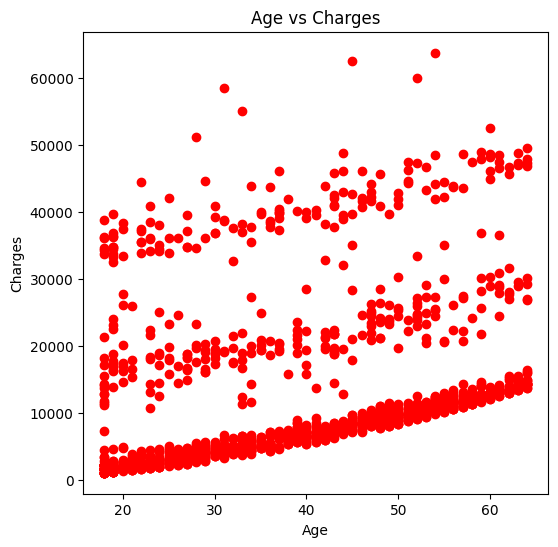

In [526]:
# Correlation between insurance charges and age

# Create scatter plot
plt.figure(figsize=(6, 6))  # Set figure size
plt.scatter(x=data_insurance["age"], y=data_insurance["charges"], color="red")
plt.title("Age vs Charges")  # Set title
plt.xlabel("Age")  # Set x-axis label
plt.ylabel("Charges")  # Set y-axis label

#Show resulys
plt.show()


In [451]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data_insurance["age"], data_insurance["charges"])

# Display the correlation coefficient and p-value
print("Pearson Correlation Coefficient: {:.2f}".format(correlation_coefficient))
print("p-value: {:.4f}".format(p_value))

Pearson Correlation Coefficient: 0.30
p-value: 0.0000


Hypothesis test

1. Hypothesis Tests on Differences in Average Charges Between Smokers and Non-smokers

> Null Hypothesis (H0): There is a significant difference in the average charges between smokers and nonsmokers

>Alternative Hypothesis (H1): .There is no significant difference in average charges between smokers and nonsmokers.

In [452]:
# Split data into smoker and non-smoker groups
smoker_group = data_insurance[data_insurance["smoker"] == "yes"]["charges"]
non_smoker_group = data_insurance[data_insurance["smoker"] == "no"]["charges"]

# Perform t-test
t_stat, p_value = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)

# Print results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Null hypothesis not rejected: \nThere is a significant difference in the average charges between smokers and non-smokers.")
else:
    print("Null hypothesis rejected: \nThere is no significant difference in the average charges between smokers and non-smokers.")


t-statistic:  32.751887766341824
p-value:  5.88946444671698e-103
Null hypothesis not rejected: 
There is a significant difference in the average charges between smokers and non-smokers.


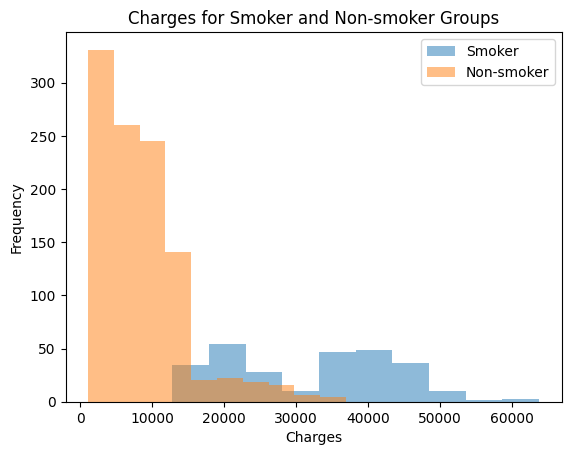

In [453]:
# Create histograms for smoker and non-smoker groups
plt.hist(smoker_group, alpha=0.5, label="Smoker")
plt.hist(non_smoker_group, alpha=0.5, label="Non-smoker")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Charges for Smoker and Non-smoker Groups")
plt.legend()

# Show results
plt.show()


2. Hypothesis Tests on Differences Between Obese Male & Female

> Null Hypothesis (H0): Obese male insurance charges is more expensive than obese female

>Alternative Hypothesis (H1): Obese male insurance charges is not more expensive than obese female

In [511]:
# Split obese customer
obese_male = data_insurance[(data_insurance["sex"] == "male") & (data_insurance["bmi_category"] == "Obesity")]["charges"]
obese_female = data_insurance[(data_insurance["sex"] == "female") & (data_insurance["bmi_category"] == "Obesity")]["charges"]

# Print sample size
print("Sample size for obese female: ", obese_female.size)
print("Sample size for obese male: ", obese_male.size)
print(f"Total size for obese customer: {obese_female.size + obese_male.size}")
print(f"Proportion of obese customer on overall data : {(obese_female.size + obese_male.size)/len(data_insurance):.2%}")
print(60*"=")

# Perform t-test
t_stat, p_value = stats.ttest_ind(obese_male, obese_female, equal_var=False)

# Show esults
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Set significance level
alpha = 0.05

# Check if p-value is less than alpha to reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Null hypothesis rejected : \nMale obese charges is not more expensive than obese female.")
else:
    print("Null hypothesis accepted: \nMale obese charges is more expensive than obese female.")


Sample size for obese female:  334
Sample size for obese male:  373
Total size for obese customer: 707
Proportion of obese customer on overall data : 52.84%
t-statistic:  2.061315997302847
p-value:  0.03963906900888259
Null hypothesis rejected : 
Male obese charges is not more expensive than obese female.
